In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

from tqdm import tqdm
from paretoset import paretoset

import model_functions as fmodel

# Matrix ISA Model Example Usage

100%|██████████| 8/8 [00:00<00:00, 815.91it/s]


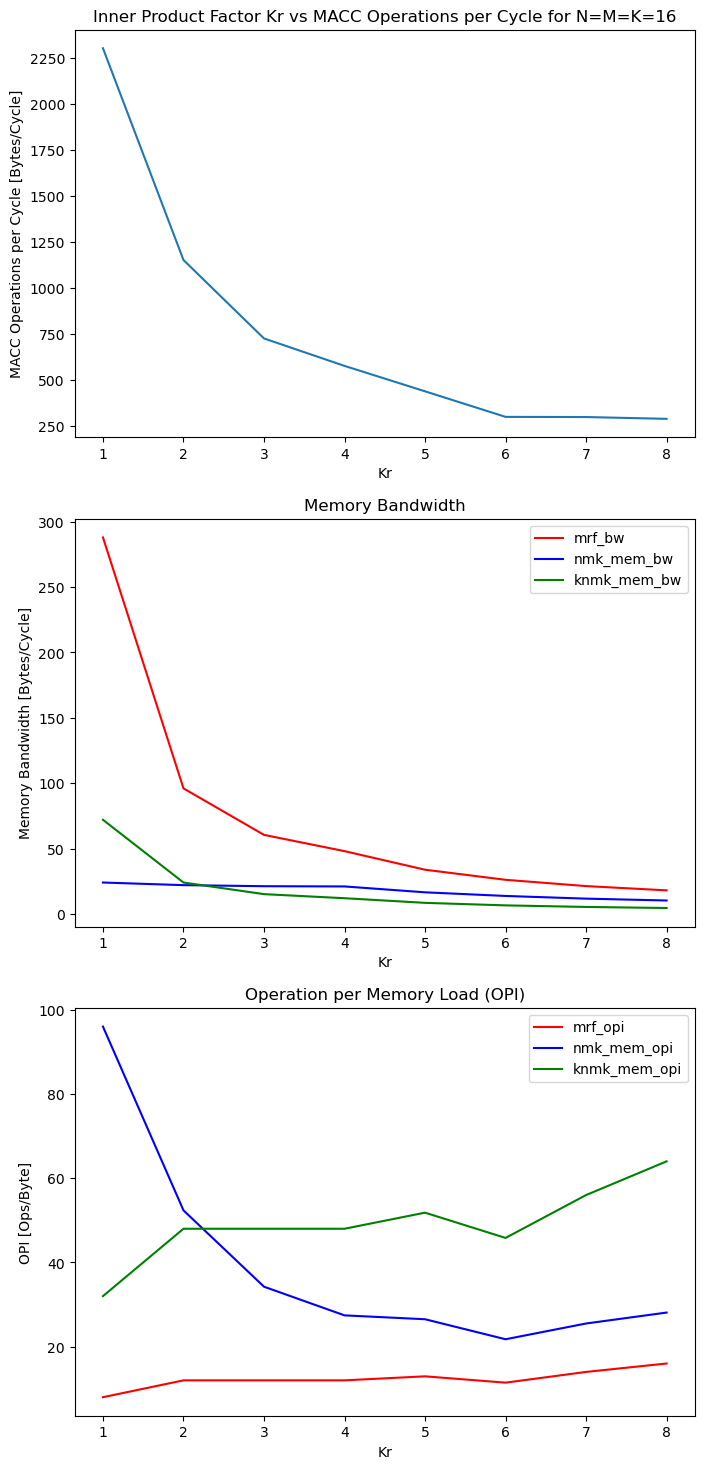

In [2]:
fig, axs = plt.subplots(3, figsize=(8,18))
axs[0].set_title('Inner Product Factor Kr vs MACC Operations per Cycle for N=M=K=16')
axs[0].set_xlabel('Kr')
axs[0].set_ylabel('MACC Operations per Cycle [Bytes/Cycle]')
axs[1].set_title('Memory Bandwidth')
axs[1].set_xlabel('Kr')
axs[1].set_ylabel('Memory Bandwidth [Bytes/Cycle]')
axs[2].set_title('Operation per Memory Load (OPI)')
axs[2].set_xlabel('Kr')
axs[2].set_ylabel('OPI [Ops/Byte]')

kls = np.array(range(1,9))
K = 16
perf_model = fmodel.init_pm(vlB=np.array([512/8]),
                            mlB=np.array([512/8]),
                            kl=kls,
                            M=np.array([K]),
                            N=np.array([K]),
                            K=np.array([K]))

# x = perf_model.index.levels[level]
knmk_mem_bw = perf_model['knmk_mem_bw']
nmk_mem_bw = perf_model['nmk_mem_bw']
mrf_bw = perf_model['mrf_bw']

opc = perf_model['ops_cycle']

knmk_mem_opi = opc/knmk_mem_bw
nmk_mem_opi = opc/nmk_mem_bw
mrf_opi = opc/mrf_bw

axs[0].plot(kls, opc)

axs[1].plot(kls, mrf_bw, color='r')
axs[1].plot(kls, nmk_mem_bw, color='b')
axs[1].plot(kls, knmk_mem_bw, color='g')
axs[1].legend(['mrf_bw', 'nmk_mem_bw', 'knmk_mem_bw'])

axs[2].plot(kls, mrf_opi, color='r')
axs[2].plot(kls, nmk_mem_opi, color='b')
axs[2].plot(kls, knmk_mem_opi, color='g')
axs[2].legend(['mrf_opi', 'nmk_mem_opi', 'knmk_mem_opi'])


100%|██████████| 8/8 [00:00<00:00, 957.28it/s]


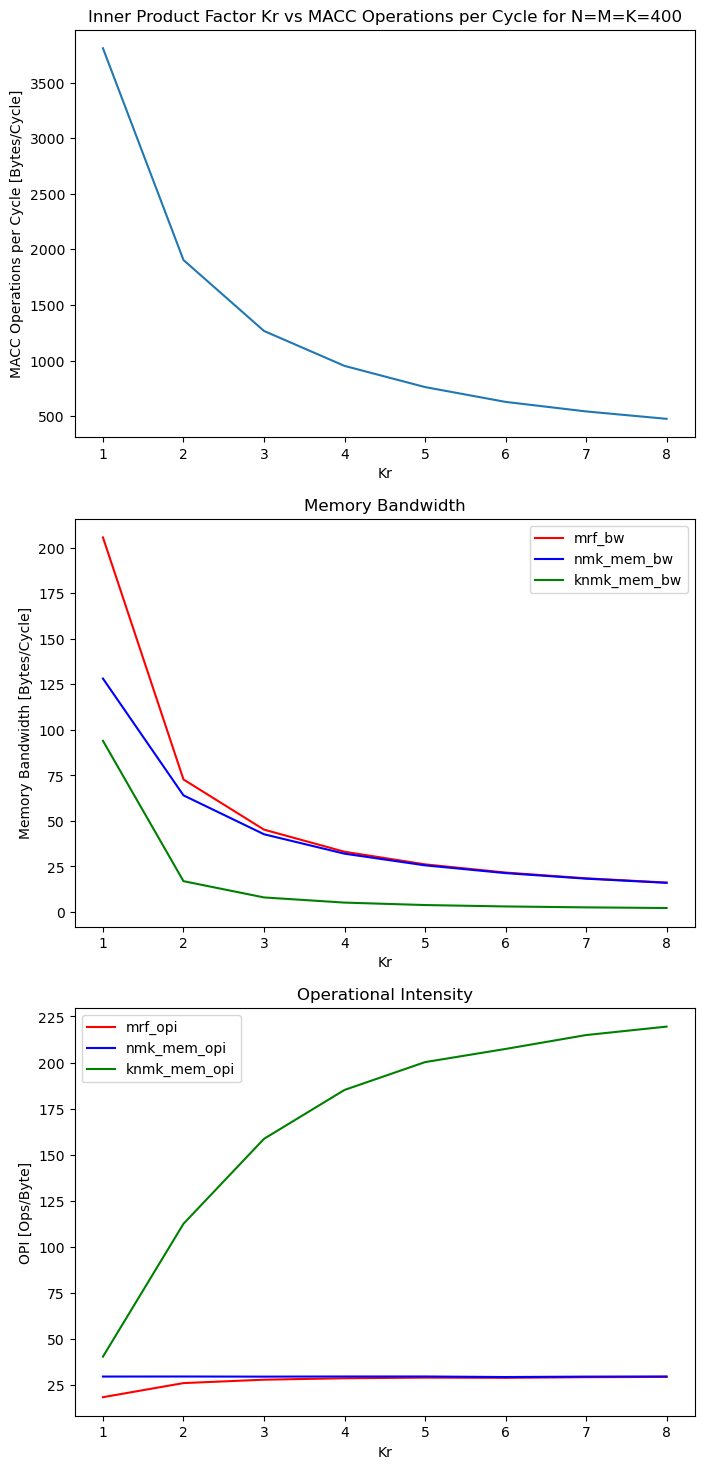

In [3]:
fig, axs = plt.subplots(3, figsize=(8,18))
axs[0].set_title('Inner Product Factor Kr vs MACC Operations per Cycle for N=M=K=400')
axs[0].set_xlabel('Kr')
axs[0].set_ylabel('MACC Operations per Cycle [Bytes/Cycle]')
axs[1].set_title('Memory Bandwidth')
axs[1].set_xlabel('Kr')
axs[1].set_ylabel('Memory Bandwidth [Bytes/Cycle]')
axs[2].set_title('Operational Intensity')
axs[2].set_xlabel('Kr')
axs[2].set_ylabel('OPI [Ops/Byte]')

kls = np.array(range(1,9))
K = 400
perf_model = fmodel.init_pm(vlB=np.array([512/8]),
                            mlB=np.array([512/8]),
                            kl=kls,
                            M=np.array([K]),
                            N=np.array([K]),
                            K=np.array([K]))

# x = perf_model.index.levels[level]
knmk_mem_bw = perf_model['knmk_mem_bw']
nmk_mem_bw = perf_model['nmk_mem_bw']
mrf_bw = perf_model['mrf_bw']

opc = perf_model['ops_cycle']

knmk_mem_opi = opc/knmk_mem_bw
nmk_mem_opi = opc/nmk_mem_bw
mrf_opi = opc/mrf_bw

axs[0].plot(kls, opc)

axs[1].plot(kls, mrf_bw, color='r')
axs[1].plot(kls, nmk_mem_bw, color='b')
axs[1].plot(kls, knmk_mem_bw, color='g')
axs[1].legend(['mrf_bw', 'nmk_mem_bw', 'knmk_mem_bw'])

axs[2].plot(kls, mrf_opi, color='r')
axs[2].plot(kls, nmk_mem_opi, color='b')
axs[2].plot(kls, knmk_mem_opi, color='g')
axs[2].legend(['mrf_opi', 'nmk_mem_opi', 'knmk_mem_opi'])


In [4]:
kls = np.array(range(1,8))
dims = np.array(range(4,128, 16))

perf_model = fmodel.init_pm(vlB=np.array([512/8]),
                            mlB=np.array([512/8]),
                            kl=kls,
                            M=dims,
                            N=dims,
                            K=dims)

100%|██████████| 3584/3584 [00:03<00:00, 1107.94it/s]


Text(0, 0.5, 'OPI [Ops/Byte]')

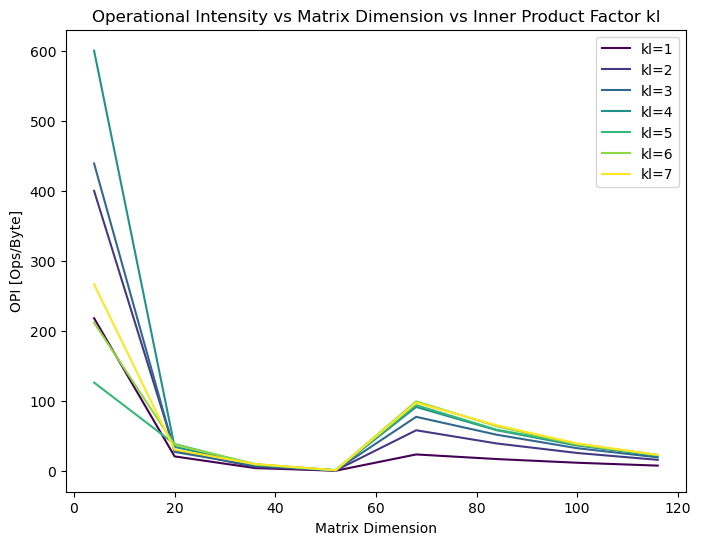

In [5]:
fig, axs = plt.subplots(figsize=(8,6))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=kls.min(), vmax=kls.max())

for kl in kls:
    knmk_mem_bw = np.zeros(len(dims))
    opc = np.zeros(len(dims))
    for i, dim in enumerate(dims):
        knmk_mem_bw[i] = perf_model.xs((dim, dim, dim, kl), level=['M', 'N', 'K','kl'])['knmk_mem_bw'].values
        opc[i] = perf_model.xs((dim, dim, dim, kl), level=['M', 'N', 'K','kl'])['ops_cycle'].values

    knmk_mem_opi = opc/knmk_mem_bw
    axs.plot(dims, knmk_mem_opi, color=cmap(norm(kl)))

axs.legend([f'kl={kl}' for kl in kls])
axs.set_title('Operational Intensity vs Matrix Dimension vs Inner Product Factor kl')
axs.set_xlabel('Matrix Dimension')
axs.set_ylabel('OPI [Ops/Byte]')


100%|██████████| 8/8 [00:00<00:00, 995.12it/s]


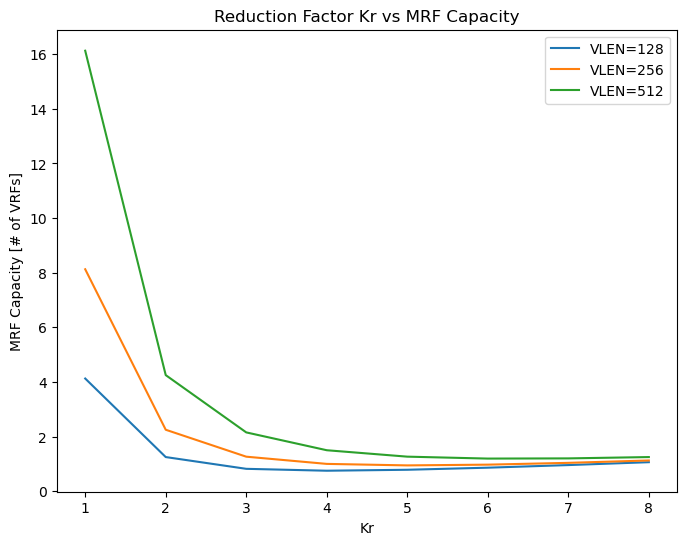

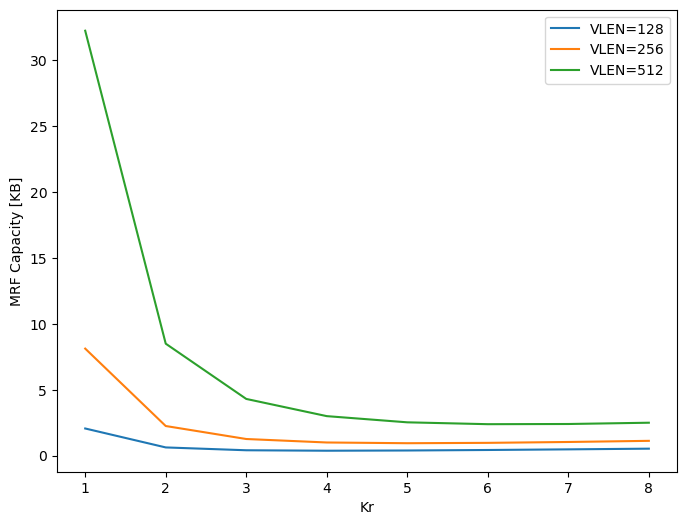

t_uk  \
databits t_mem M  N  K   l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu                
8        20    64 64 800 256      1  64.0 64.0 2         2    4     1           438.222222   
                                  2  64.0 64.0 2         2    4     1           921.777778   
                                  3  64.0 64.0 2         2    4     1          1386.370370   
                                  4  64.0 64.0 2         2    4     1          1846.222222   
                                  5  64.0 64.0 2         2    4     1          2304.177778   
                                  6  64.0 64.0 2         2    4     1          2761.185185   
                                  7  64.0 64.0 2         2    4     1          3217.650794   
                                  8  64.0 64.0 2         2    4     1          3673.777778   

                                                                                   util  \
databits t_mem M  N  K   l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu             
8        20    64 64 800 256      1  64.0 64.0 2         2    4     1          1.000000   
                                  2  64.0 64.0 2         2    4     1          1.000000   
                                  3  64.0 64.0 2         2    4     1          0.997503   
                                  4  64.0 64.0 2         2    4     1          1.000000   
                                  5  64.0 64.0 2         2    4     1          1.000000   
                                  6  64.0 64.0 2         2    4     1          0.997512   
                                  7  64.0 64.0 2         2    4     1          0.997516   
                                  8  64.0 64.0 2         2    4     1          1.000000   

                                                                                 ops_cycle  \
databits t_mem M  N  K   l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu                
8        20    64 64 800 256      1  64.0 64.0 2         2    4     1          4096.000000   
                                  2  64.0 64.0 2         2    4     1          2048.000000   
                                  3  64.0 64.0 2         2    4     1          1361.924261   
                                  4  64.0 64.0 2         2    4     1          1024.000000   
                                  5  64.0 64.0 2         2    4     1           819.200000   
                                  6  64.0 64.0 2         2    4     1           680.968491   
                                  7  64.0 64.0 2         2    4     1           583.689086   
                                  8  64.0 64.0 2         2    4     1           512.000000   

                                                                               max_mregs  \
databits t_mem M  N  K   l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu              
8        20    64 64 800 256      1  64.0 64.0 2         2    4     1                2.0   
                                  2  64.0 64.0 2         2    4     1                2.0   
                                  3  64.0 64.0 2         2    4     1                2.0   
                                  4  64.0 64.0 2         2    4     1                2.0   
                                  5  64.0 64.0 2         2    4     1                2.0   
                                  6  64.0 64.0 2         2    4     1                2.0   
                                  7  64.0 64.0 2         2    4     1                2.0   
                                  8  64.0 64.0 2         2    4     1                2.0   

                                                                               max_mrf_capacity  \
databits t_mem M  N  K   l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu                     
8        20    64 64 800 256      1  64.0 64.0 2         2    4     1                 32.250000   
                                  2  64.0 64.0 2         2    4     1      

In [6]:
fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('Reduction Factor Kr vs MRF Capacity')
axs.set_xlabel('Kr')
axs.set_ylabel('MRF Capacity [# of VRFs]')

fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.set_xlabel('Kr')
ax2.set_ylabel('MRF Capacity [KB]')

kls = np.array(range(1,9))
for vlB in np.array([128, 256, 512])/8:

    perf_model = fmodel.init_pm(databits=np.array([8]), 
                                vlB=np.array([vlB]), 
                                mlB=np.array([vlB]), 
                                K=np.array([100*8]), 
                                kl=kls)

    mrf_capacity = perf_model['mrf_capacity']
    max_mrf_capacity = perf_model['max_mrf_capacity']

    axs.plot(kls, mrf_capacity*2**10/(vlB*32))
    ax2.plot(kls, max_mrf_capacity)

axs.legend(['VLEN=128', 'VLEN=256', 'VLEN=512'])
ax2.legend(['VLEN=128', 'VLEN=256', 'VLEN=512'])
plt.show()
perf_model

### Exploring Design Space

The model can be used to sweep ranges of the input parameters, and the output performance specs can be visualized using pareto-optimal curves.

With these plots we can visualize the tradeoffs between ngates capacity, memory bandwidth, and performance (operations per cycle).

In [13]:
perf_model = fmodel.init_pm(
    # software parameters
    N = np.array(range(4,64, 8)),
    M = np.array(range(4,64, 8)),
    K = np.array(range(4,64, 8)),
    widen = np.array([4]),
    # micro architecutre parameters
    mlB = np.array(range(128,513, 128))/8,
    vlB = np.array([128, 256, 512])/8,
    kl = np.array([1,2,4]),
    num_mregs = np.array(range(2,6,2)),
    t_op = np.array([0,1,2]),
    width_mmu = np.array([0.5, 1])
)


100%|██████████| 221184/221184 [03:18<00:00, 1112.01it/s]


t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu          
8        20    4  4  4  256      1  64.0 48.0 2         0    4     0.5        440.0   
                                         64.0 2         0    4     0.5        568.0   
                                 2  64.0 48.0 2         0    4     0.5        456.0   
                                         64.0 2         0    4     0.5        584.0   
                                 4  64.0 48.0 2         0    4     0.5        488.0   
                                         64.0 2         0    4     0.5        616.0   
                  36 4  256      1  32.0 48.0 2         0    4     0.5        440.0   
                                         64.0 2         0    4     0.5        568.0   
                                 2  32.0 48.0 2         0    4     0.5        456.0   
                                         64.0 2         0    4     0.5        584.0   
                                 4  32.0 32.0 2         0    4     0.5        360.0   
                                         48.0 2         0    4     0.5        488.0   
                                         64.0 2         0    4     0.5        616.0   
                  52 4  256      1  16.0 48.0 2         0    4     0.5        440.0   
                                         64.0 2         0    4     0.5        568.0   
                                 2  16.0 48.0 2         0    4     0.5        456.0   
                                         64.0 2         0    4     0.5        584.0   
                                 4  16.0 48.0 2         0    4     0.5        488.0   
                                         64.0 2         0    4     0.5        616.0   
               36 36 4  256      4  32.0 32.0 2         0    4     0.5        360.0   
               52 4  4  256      4  64.0 48.0 2         0    4     0.5        488.0   
                     12 256      1  64.0 48.0 2         0    4     0.5        472.0   
                                 2  64.0 48.0 2         0    4     0.5        520.0   
                  36 4  256      2  32.0 48.0 2         0    4     0.5        456.0   
                                 4  32.0 48.0 2         0    4     0.5        488.0   
                     12 256      1  32.0 48.0 2         0    4     0.5        472.0   
                  52 4  256      2  16.0 48.0 2         0    4     0.5        456.0   
                                 4  16.0 48.0 2         0    4     0.5        488.0   

                                                                                  util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu             
8        20    4  4  4  256      1  64.0 48.0 2         0    4     0.5        0.859375   
                                         64.0 2         0    4     0.5        0.878906   
                                 2  64.0 48.0 2         0    4     0.5        0.859375   
                                         64.0 2         0    4     0.5        0.878906   
                                 4  64.0 48.0 2         0    4     0.5        0.859375   
                                         64.0 2         0    4     0.5        0.878906   
                  36 4  256      1  32.0 48.0 2         0    4     0.5        0.859375   
                                         64.0 2         0    4     0.5        0.878906   
                                 2  32.0 48.0 2         0    4     0.5        0.859375   
                                         64.0 2         0    4     0.5        0.878906   
                                 4  32.0 32.0 2         0    4     0.5        0.820312   
                                         48.0 2         0    4     0.5        0.859375   
                                         64.0 2         0    4     0.5        0.878906   
                  52 4  256      1  16.0 48.0 2         0    4     0.5        0.859375   
                            

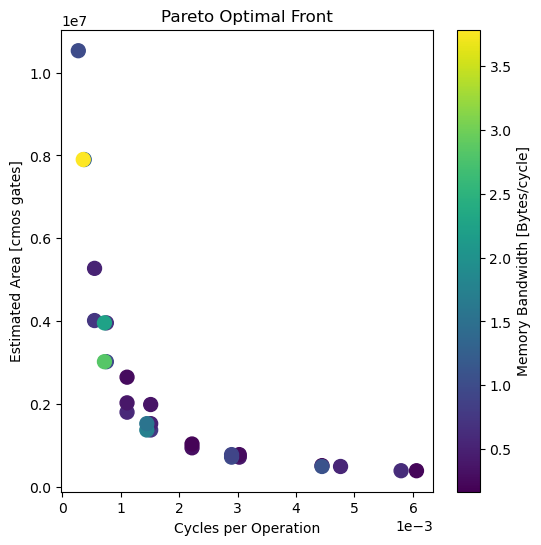

In [23]:
fperf_model = perf_model.copy()
fperf_model = fperf_model[fperf_model['nmk_mem_bw'] <= 64]
fperf_model = fperf_model[fperf_model['mrf_capacity'] <= 128]
fperf_model = fperf_model[fperf_model['ops_cycle'] >= 1/0.7e-2]

pm_pareto = fperf_model[['ops_cycle','opu_gates', 'nmk_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = fperf_model.loc[mask,'nmk_mem_bw']
ngates = fperf_model.loc[mask,'opu_gates']
opc = fperf_model.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Pareto Optimal Front')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

scatter = axs.scatter(1/opc, ngates, c=bw, cmap='viridis', s=100)
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.colorbar(scatter, ax=axs, label='Memory Bandwidth [Bytes/cycle]')
fperf_model[mask]

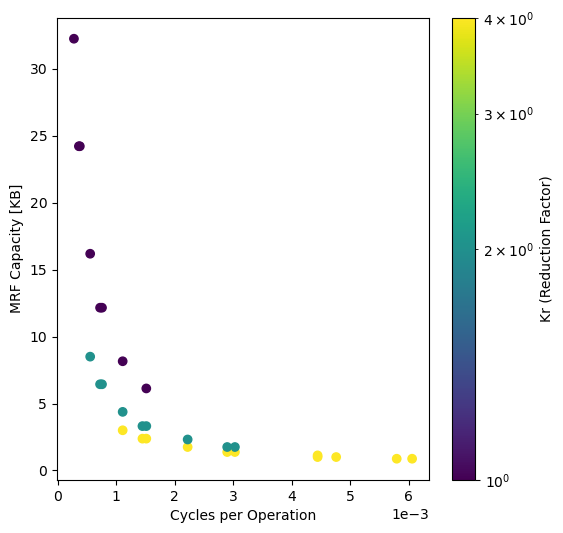

In [24]:
mrf = fperf_model.loc[mask, 'mrf_capacity']
fig, axs = plt.subplots(1, figsize=(6, 6))
kls = fperf_model.loc[mask].index.get_level_values('kl')
scatter = axs.scatter(1/opc, mrf, c=kls, cmap='viridis', norm=LogNorm())
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('MRF Capacity [KB]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
fig.colorbar(scatter, ax=axs, label='Kr (Reduction Factor)')
plt.show()

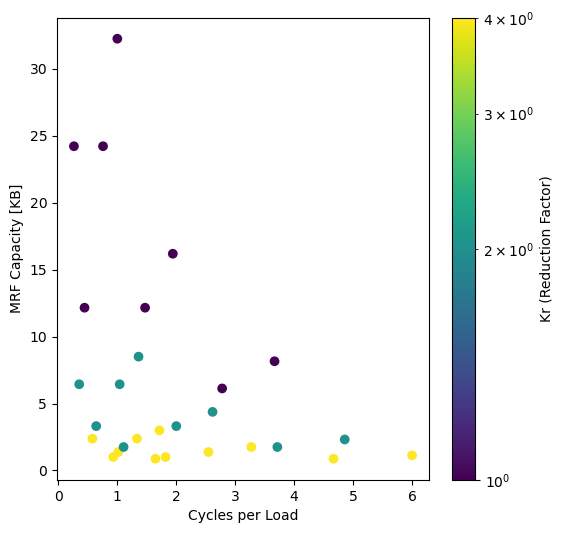

In [25]:
fig, axs = plt.subplots(1, figsize=(6, 6))
kls = fperf_model.loc[mask].index.get_level_values('kl')
scatter = axs.scatter(1/bw, mrf, c=kls, cmap='viridis', norm=LogNorm())
axs.set_xlabel('Cycles per Load')
axs.set_ylabel('MRF Capacity [KB]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
fig.colorbar(scatter, ax=axs, label='Kr (Reduction Factor)')
plt.show()

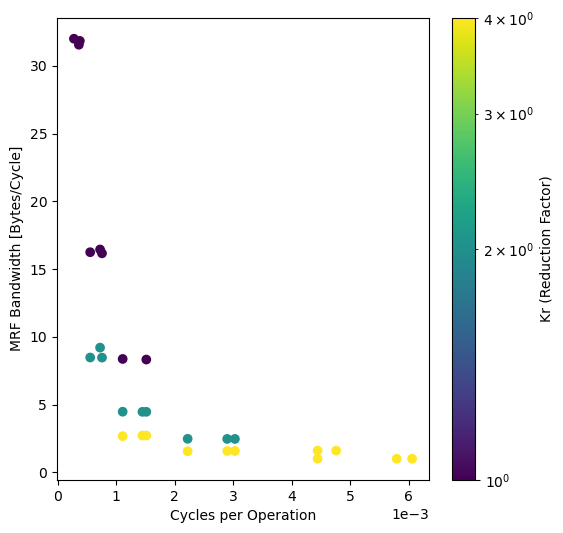

In [26]:
mrf = fperf_model.loc[mask, 'mrf_capacity']
mrf_bw = fperf_model.loc[mask, 'mrf_bw']
fig, axs = plt.subplots(1, figsize=(6, 6))
kls = fperf_model.loc[mask].index.get_level_values('kl')
scatter = axs.scatter(1/opc, mrf_bw, c=kls, cmap='viridis', norm=LogNorm())
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('MRF Bandwidth [Bytes/Cycle]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
fig.colorbar(scatter, ax=axs, label='Kr (Reduction Factor)')
plt.show()

#### Memory Data Reuse
If the matrices are sufficiently large to reuse tiles, then bandwidth can be decreased:

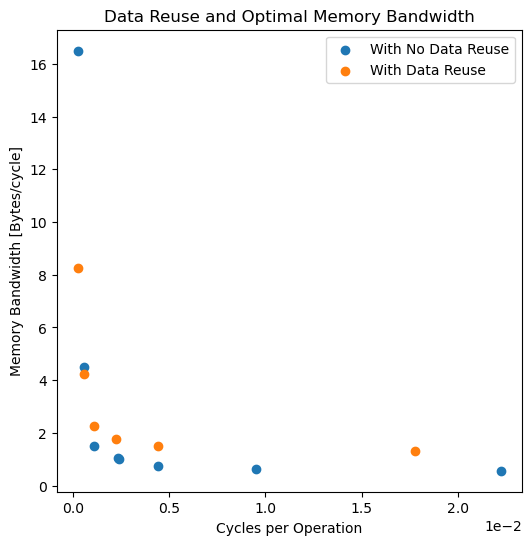

In [ ]:
no_reuse_pm = perf_model.copy()
pm_pareto = no_reuse_pm[['ops_cycle','knmk_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min'])

bw = no_reuse_pm.loc[mask,'knmk_mem_bw']
opc = no_reuse_pm.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,6))
scatter = axs.scatter(1/opc, bw, label='With No Data Reuse')

reuse_perf_model = perf_model.copy()
reuse_perf_model = reuse_perf_model[reuse_perf_model['nmk_mem_bw'] <= 64]
reuse_perf_model = reuse_perf_model[reuse_perf_model['ops_cycle'] >= 1/(4e-2)]

pm_pareto = reuse_perf_model[['ops_cycle','nmk_mem_bw']]
reuse_mask = paretoset(pm_pareto, sense=['max', 'min'])

bw = reuse_perf_model.loc[reuse_mask,'nmk_mem_bw']
opc = reuse_perf_model.loc[reuse_mask,'ops_cycle']

scatter = axs.scatter(1/opc, bw, label='With Data Reuse')
axs.set_title('Data Reuse and Optimal Memory Bandwidth')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Memory Bandwidth [Bytes/cycle]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()


100%|██████████| 585/585 [00:00<00:00, 1139.66it/s]


t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu          
8        200   64 64 64 256      1  16.0 16.0 2         0    4     1          496.0   
                                              4         0    4     1          496.0   
                                              6         0    4     1          496.0   
                                         20.0 2         0    4     1          504.0   
                                              4         0    4     1          504.0   
                                              6         0    4     1          504.0   
                                         24.0 2         0    4     1          512.0   
                                              4         0    4     1          512.0   
                                         28.0 4         0    4     1          520.0   
                                         32.0 4         0    4     1          528.0   
                                         56.0 2         0    4     1          576.0   
                                         60.0 2         0    4     1          584.0   
                                         64.0 2         0    4     1          592.0   

                                                                                  util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu             
8        200   64 64 64 256      1  16.0 16.0 2         0    4     1          0.387097   
                                              4         0    4     1          0.774194   
                                              6         0    4     1          1.000000   
                                         20.0 2         0    4     1          0.392063   
                                              4         0    4     1          0.784127   
                                              6         0    4     1          0.950000   
                                         24.0 2         0    4     1          0.340278   
                                              4         0    4     1          0.680556   
                                         28.0 4         0    4     1          0.835165   
                                         32.0 4         0    4     1          0.969697   
                                         56.0 2         0    4     1          0.567460   
                                         60.0 2         0    4     1          0.609132   
                                         64.0 2         0    4     1          0.648649   

                                                                               ops_cycle  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu               
8        200   64 64 64 256      1  16.0 16.0 2         0    4     1           99.096774   
                                              4         0    4     1          198.193548   
                                              6         0    4     1          256.000000   
                                         20.0 2         0    4     1          125.460317   
                                              4         0    4     1          250.920635   
                                              6         0    4     1          304.000000   
                                         24.0 2         0    4     1          130.666667   
                                              4         0    4     1          261.333333   
                                         28.0 4         0    4     1          374.153846   
                                         32.0 4         0    4     1          496.484848   
                                         56.0 2         0    4     1          508.444444   
                                         60.0 2         0    4     1          584.767123   
                                         64.0 2         0    4     1          664.216216   

                                         

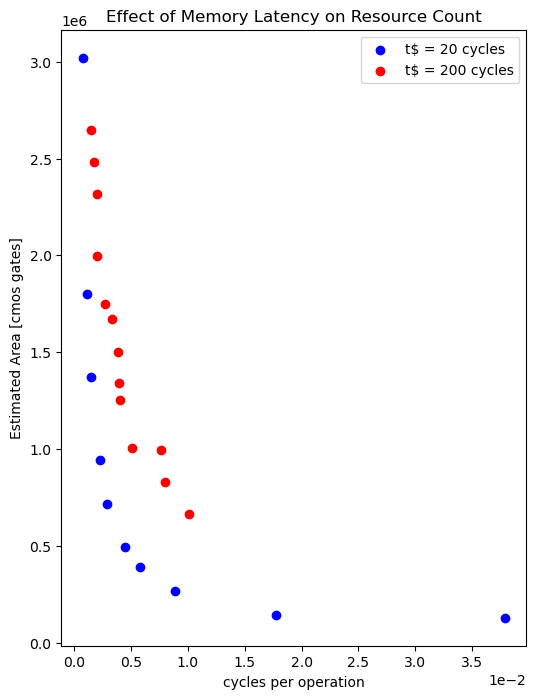

In [ ]:
tm20_perf_model = perf_model.copy()
tm200_perf_model = fmodel.init_pm(
    t_mem = np.array([200]),
    l2_cache = np.array([256]),
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([1])
)
tm20_perf_model = tm20_perf_model[tm20_perf_model['nmk_mem_bw'] <= 64]
tm20_perf_model = tm20_perf_model[tm20_perf_model['opu_gates'] <= 3.2e6]
tm20_perf_model = tm20_perf_model[tm20_perf_model['ops_cycle'] >= 10]

tm200_perf_model = tm200_perf_model[tm200_perf_model['nmk_mem_bw'] <= 64]
tm200_perf_model = tm200_perf_model[tm200_perf_model['opu_gates'] <= 3.2e6]
tm200_perf_model = tm200_perf_model[tm200_perf_model['ops_cycle'] >= 10]

tm20_pm_pareto = tm20_perf_model[['ops_cycle','opu_gates']]
tm20_mask = paretoset(tm20_pm_pareto, sense=['max', 'min'])

tm200_pm_pareto = tm200_perf_model[['ops_cycle','opu_gates']]
tm200_mask = paretoset(tm200_pm_pareto, sense=['max', 'min'])

fig, axs = plt.subplots(1,figsize=(6,8))
axs.set_title('Effect of Memory Latency on Resource Count')
axs.set_xlabel('cycles per operation')
axs.set_ylabel('Estimated Area [cmos gates]')

bw = tm20_perf_model.loc[tm20_mask,'nmk_mem_bw']
ngates = tm20_perf_model.loc[tm20_mask,'opu_gates']
opc = tm20_perf_model.loc[tm20_mask,'ops_cycle']
scatter = axs.scatter(1/opc, ngates, color='b', label='t$ = 20 cycles')

bw = tm200_perf_model.loc[tm200_mask,'nmk_mem_bw']
ngates = tm200_perf_model.loc[tm200_mask,'opu_gates']
opc = tm200_perf_model.loc[tm200_mask,'ops_cycle']
scatter = axs.scatter(1/opc, ngates, color='r', label='t$ = 200 cycles')

axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()
tm200_perf_model[tm200_mask]

We can compare these tradeoffs for half-width and full-width MMU datapaths:

100%|██████████| 2340/2340 [00:01<00:00, 1175.44it/s]


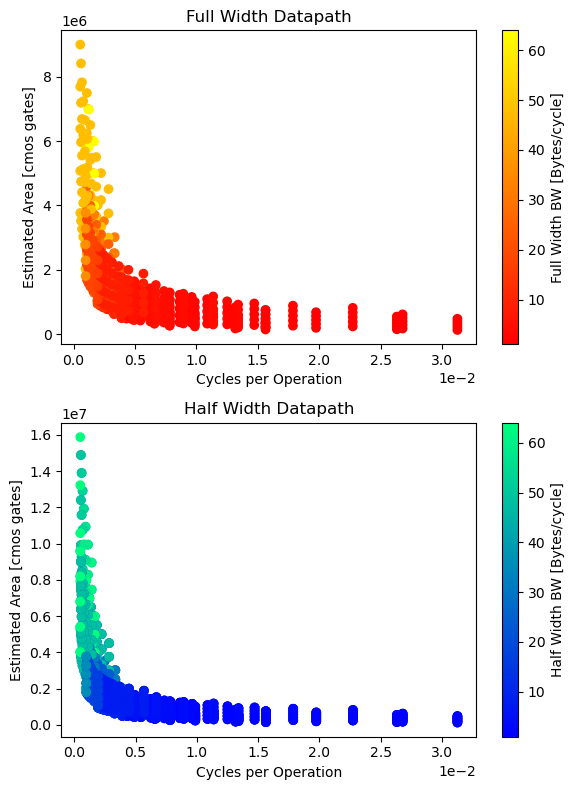

In [ ]:
perf_model = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    N = np.array(range(4,64, 8)),
    M = np.array(range(4,64, 8)),
    K = np.array(range(4,64, 8)),
    num_mregs = np.array(range(2,6,2)),
    t_op = np.array([2]),
    kl = np.array([1,2,4,8])
)
perf_model_t1 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([2]),
    kl = np.array([1,2,4,8]),
)
perf_model_t4 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    kl = np.array([1,2,4,8]),
)
perf_model_t1 = perf_model_t1[perf_model_t1['knmk_mem_bw'] <= 64]
bw = perf_model_t1['knmk_mem_bw']
ngates = perf_model_t1['opu_gates']
opc = perf_model_t1['ops_cycle']

perf_model_t4 = perf_model_t4[perf_model_t4['knmk_mem_bw'] <= 64]
bw_t4 = perf_model_t4['knmk_mem_bw']
ngates_t4 = perf_model_t4['opu_gates']
opc_t4 = perf_model_t4['ops_cycle']

fig, axs = plt.subplots(2, figsize=(6, 8))
# Plot for full width datapath
axs[0].set_title('Full Width Datapath')
axs[0].set_xlabel('Cycles per Operation')
axs[0].set_ylabel('Estimated Area [cmos gates]')
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
full = axs[0].scatter(1/opc, ngates, c=bw, cmap='autumn', label='full width')
fig.colorbar(full, ax=axs[0], label='Full Width BW [Bytes/cycle]')

# Plot for half width datapath
axs[1].set_title('Half Width Datapath')
axs[1].set_xlabel('Cycles per Operation')
axs[1].set_ylabel('Estimated Area [cmos gates]')
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
half = axs[1].scatter(1/opc_t4, ngates_t4, c=bw_t4, cmap='winter', label='half width')
fig.colorbar(half, ax=axs[1], label='Half Width BW [Bytes/cycle]')
plt.tight_layout()
plt.show()


100%|██████████| 585/585 [00:00<00:00, 1145.34it/s]


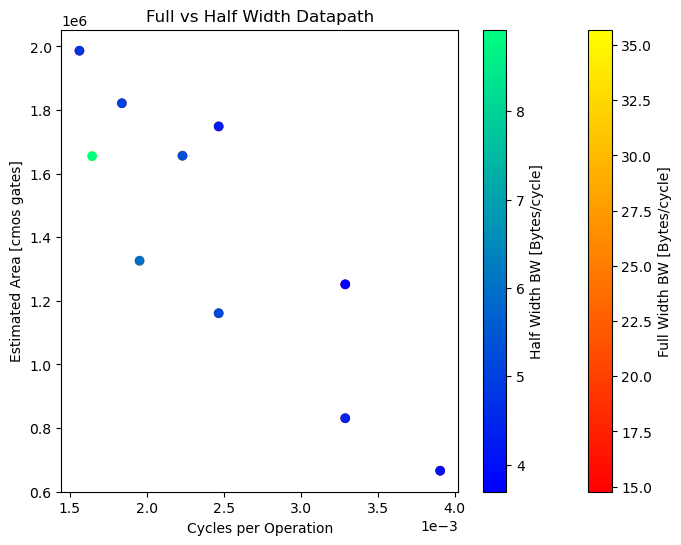

In [ ]:
perf_model_t1 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([1])
)
perf_model_t4 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5])
)
perf_model_t1 = perf_model_t1[perf_model_t1['knmk_mem_bw'] <= 64]
perf_model_t1 = perf_model_t1[perf_model_t1['opu_gates'] <= 2e6]
perf_model_t1 = perf_model_t1[perf_model_t1['ops_cycle'] >= 1/3.5e-2]

pm_pareto = perf_model_t1[['ops_cycle','opu_gates', 'knmk_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = perf_model_t1.loc[mask,'knmk_mem_bw']
ngates = perf_model_t1.loc[mask,'opu_gates']
opc = perf_model_t1.loc[mask,'ops_cycle']

perf_model_t4 = perf_model_t4[perf_model_t4['knmk_mem_bw'] <= 64]
perf_model_t4 = perf_model_t4[perf_model_t4['opu_gates'] <= 2e6]
perf_model_t4 = perf_model_t4[perf_model_t4['ops_cycle'] >= 1/3.5e-2]

pm_pareto_t4 = perf_model_t4[['ops_cycle','opu_gates', 'knmk_mem_bw']]
mask_t4 = paretoset(pm_pareto_t4, sense=['max', 'min', 'min'])

bw_t4 = perf_model_t4.loc[mask_t4,'knmk_mem_bw']
ngates_t4 = perf_model_t4.loc[mask_t4,'opu_gates']
opc_t4 = perf_model_t4.loc[mask_t4,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(8,6))
axs.set_title('Full vs Half Width Datapath')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

full = axs.scatter(1/opc, ngates, c=bw, cmap='autumn', label='full width')
fig.colorbar(full, ax=axs, label = 'Full Width BW [Bytes/cycle]')

half = axs.scatter(1/opc_t4, ngates_t4, c=bw_t4, cmap='winter', label='half width')
fig.colorbar(half, ax=axs, label = 'Half Width BW [Bytes/cycle]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


In [ ]:
perf_model_t4.loc[mask_t4]

t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu          
8        20    64 64 64 256      1  16.0 16.0 2         0    4     0.5        424.0   
                                         20.0 2         0    4     0.5        456.0   
                                              4         0    4     0.5        456.0   
                                         28.0 2         0    4     0.5        520.0   
                                              4         0    4     0.5        520.0   
                                         32.0 2         0    4     0.5        552.0   
                                         40.0 2         0    4     0.5        616.0   
                                         44.0 2         0    4     0.5        648.0   
                                         48.0 2         0    4     0.5        680.0   
                                    32.0 20.0 2         0    4     0.5        456.0   

                                                                                  util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu             
8        20    64 64 64 256      1  16.0 16.0 2         0    4     0.5        1.000000   
                                         20.0 2         0    4     0.5        0.950000   
                                              4         0    4     0.5        0.950000   
                                         28.0 2         0    4     0.5        0.904762   
                                              4         0    4     0.5        0.904762   
                                         32.0 2         0    4     0.5        1.000000   
                                         40.0 2         0    4     0.5        0.700000   
                                         44.0 2         0    4     0.5        0.772727   
                                         48.0 2         0    4     0.5        0.833333   
                                    32.0 20.0 2         0    4     0.5        0.950000   

                                                                               ops_cycle  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu               
8        20    64 64 64 256      1  16.0 16.0 2         0    4     0.5        256.000000   
                                         20.0 2         0    4     0.5        304.000000   
                                              4         0    4     0.5        304.000000   
                                         28.0 2         0    4     0.5        405.333333   
                                              4         0    4     0.5        405.333333   
                                         32.0 2         0    4     0.5        512.000000   
                                         40.0 2         0    4     0.5        448.000000   
                                         44.0 2         0    4     0.5        544.000000   
                                         48.0 2         0    4     0.5        640.000000   
                                    32.0 20.0 2         0    4     0.5        608.000000   

                                                                              max_mregs  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu              
8        20    64 64 64 256      1  16.0 16.0 2         0    4     0.5              2.0   
                                         20.0 2         0    4     0.5              2.0   
                                              4         0    4     0.5              2.0   
                                         28.0 2         0    4     0.5              2.0   
                                              4         0    4     0.5              2.0   
                                         32.0 2         0    4     0.5              2.0   
                                         40.0 2         0    4     0.5              2.0   
                             

In [ ]:
perf_model_t1.loc[mask]

t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu          
8        20    64 64 64 256      1  16.0 16.0 2         0    4     1          136.0   
                                         20.0 2         0    4     1          144.0   
                                              4         0    4     1          144.0   
                                         28.0 2         0    4     1          160.0   
                                              4         0    4     1          160.0   
                                         32.0 2         0    4     1          168.0   
                                         40.0 2         0    4     1          184.0   
                                         44.0 2         0    4     1          192.0   
                                         48.0 2         0    4     1          200.0   
                                    32.0 20.0 2         0    4     1          144.0   

                                                                                  util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu             
8        20    64 64 64 256      1  16.0 16.0 2         0    4     1          1.000000   
                                         20.0 2         0    4     1          0.950000   
                                              4         0    4     1          0.950000   
                                         28.0 2         0    4     1          0.904762   
                                              4         0    4     1          0.904762   
                                         32.0 2         0    4     1          1.000000   
                                         40.0 2         0    4     1          0.700000   
                                         44.0 2         0    4     1          0.772727   
                                         48.0 2         0    4     1          0.833333   
                                    32.0 20.0 2         0    4     1          0.950000   

                                                                               ops_cycle  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu               
8        20    64 64 64 256      1  16.0 16.0 2         0    4     1          256.000000   
                                         20.0 2         0    4     1          304.000000   
                                              4         0    4     1          304.000000   
                                         28.0 2         0    4     1          405.333333   
                                              4         0    4     1          405.333333   
                                         32.0 2         0    4     1          512.000000   
                                         40.0 2         0    4     1          448.000000   
                                         44.0 2         0    4     1          544.000000   
                                         48.0 2         0    4     1          640.000000   
                                    32.0 20.0 2         0    4     1          608.000000   

                                                                              max_mregs  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu              
8        20    64 64 64 256      1  16.0 16.0 2         0    4     1                2.0   
                                         20.0 2         0    4     1                2.0   
                                              4         0    4     1                2.0   
                                         28.0 2         0    4     1                2.0   
                                              4         0    4     1                2.0   
                                         32.0 2         0    4     1                2.0   
                                         40.0 2         0    4     1                2.0   
                             